In [1]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('bit_coin_prices_trade.csv')
df.head()

,Unnamed: 0,bollinger_buy,bollinger_lower,bollinger_sell,bollinger_upper,macd_buy,macd_ema_diff,macd_signal_line,market_cap,price,rolling_mean,rolling_mean_buy,rolling_mean_sell,rsi,rsi_buy,rsi_sell,snapped_at,total_volume
0,0.0,False,NaN,False,NaN,True,0.000000,135.300000,1.500518e+09,135.30,NaN,False,False,NaN,False,False,2013-04-28,0.0
1,1.0,False,NaN,False,NaN,True,0.149423,139.000000,1.575032e+09,141.96,NaN,False,False,NaN,False,False,2013-04-29,0.0
2,2.0,False,NaN,False,NaN,True,-0.016132,137.483607,1.501657e+09,135.30,NaN,False,False,NaN,False,False,2013-04-30,0.0
3,3.0,False,NaN,False,NaN,True,-0.751748,130.544715,1.298952e+09,117.00,NaN,False,False,NaN,False,False,2013-05-01,0.0
4,4.0,False,NaN,False,NaN,True,-1.675627,122.478701,1.148668e+09,103.43,NaN,False,False,NaN,False,False,2013-05-02,0.0


In [3]:
just_dates_and_prices_df = df[['snapped_at', 'price']]
just_dates_and_prices_df.head()

,snapped_at,price
0,2013-04-28,135.30
1,2013-04-29,141.96
2,2013-04-30,135.30
3,2013-05-01,117.00
4,2013-05-02,103.43


In [4]:
just_dates_and_prices_df.dtypes

snapped_at     object
price         float64
dtype: object

In [5]:
just_dates_and_prices_df['snapped_at'] = pd.DatetimeIndex(just_dates_and_prices_df['snapped_at'])
just_dates_and_prices_df.dtypes

/home/ak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


snapped_at    datetime64[ns]
price                float64
dtype: object

In [6]:
just_dates_and_prices_df.head()

,snapped_at,price
0,2013-04-28,135.30
1,2013-04-29,141.96
2,2013-04-30,135.30
3,2013-05-01,117.00
4,2013-05-02,103.43


In [7]:
training_data = just_dates_and_prices_df.rename(columns={'snapped_at': 'ds', 'price': 'y'})

In [8]:
training_data.head()

,ds,y
0,2013-04-28,135.30
1,2013-04-29,141.96
2,2013-04-30,135.30
3,2013-05-01,117.00
4,2013-05-02,103.43


Text(0.5,0,'Date')

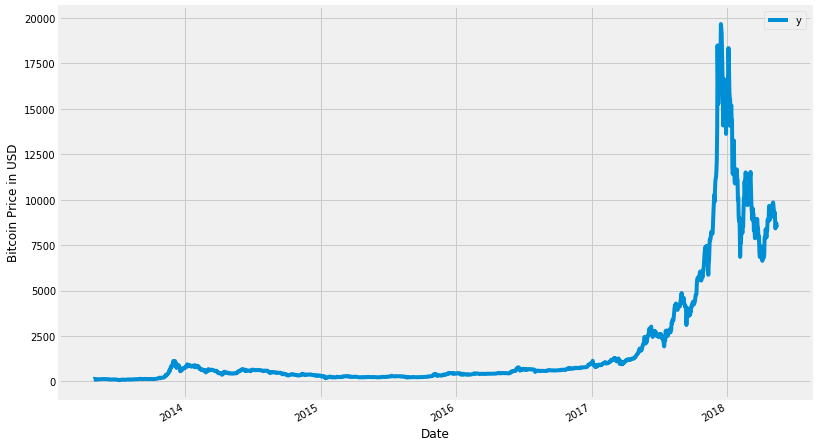

In [9]:
ax = training_data.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Bitcoin Price in USD')
ax.set_xlabel('Date')

In [10]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

# the learning
my_model.fit(training_data)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/ak/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [11]:
future_dates = my_model.make_future_dataframe(periods=30)
future_dates.tail()

,ds
1868,2018-06-11
1869,2018-06-12
1870,2018-06-13
1871,2018-06-14
1872,2018-06-15


In [12]:
training_data.tail()

,ds,y
1838,2018-05-12,8421.00
1839,2018-05-13,8486.67
1840,2018-05-14,8709.46
1841,2018-05-15,8672.90
1842,2018-05-16,8480.16


In [13]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1868,2018-06-11,12734.560988,10294.897402,15150.361703
1869,2018-06-12,12744.055036,10386.824090,15165.582949
1870,2018-06-13,12768.089806,10138.558789,15174.935175
1871,2018-06-14,12791.606585,10305.075133,15276.364672
1872,2018-06-15,12814.788605,10160.474901,15159.083991


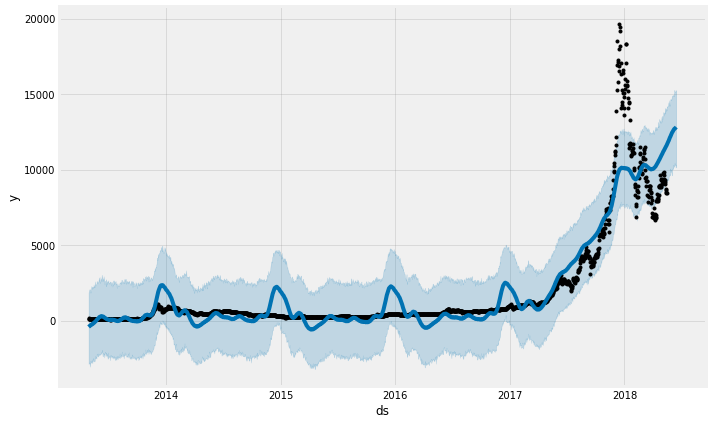

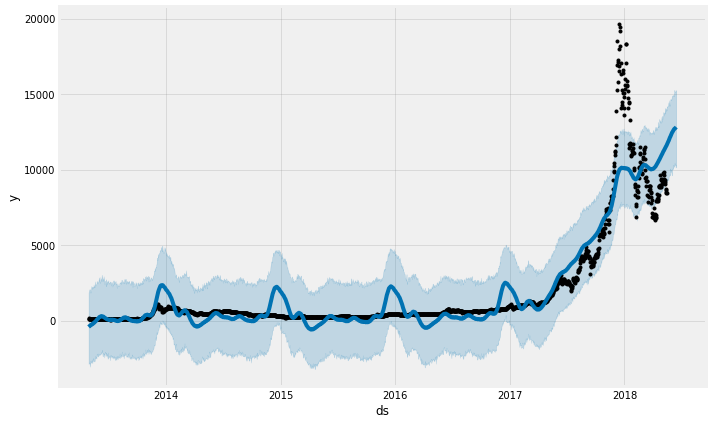

In [14]:
my_model.plot(forecast, uncertainty=True)

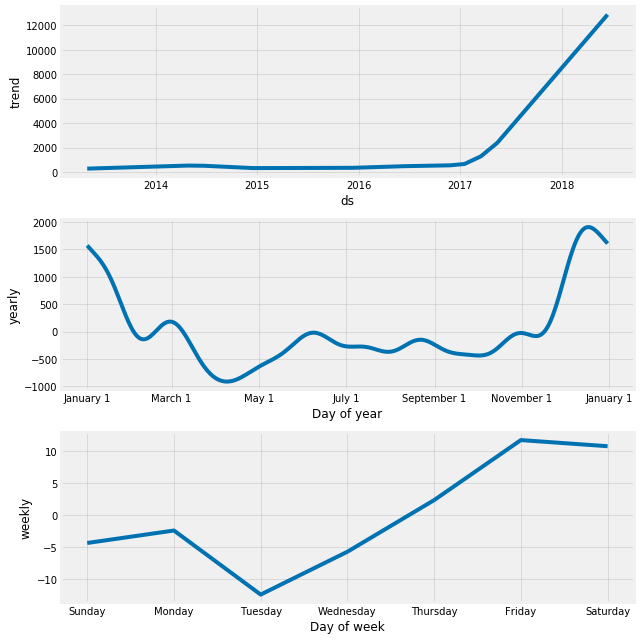

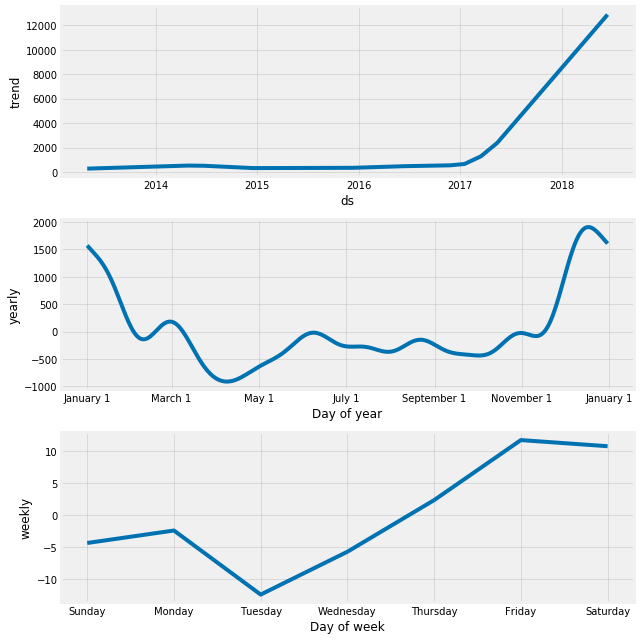

In [15]:
my_model.plot_components(forecast)

In [18]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(50)

,ds,yhat,yhat_lower,yhat_upper
1823,2018-04-27,10878.145650,8572.557362,13177.713204
1824,2018-04-28,10919.722089,8529.910936,13231.638641
1825,2018-04-29,10946.947363,8587.814885,13489.256879
1826,2018-04-30,10990.876766,8715.945741,13168.681228
1827,2018-05-01,11022.547386,8554.271694,13555.332219
1828,2018-05-02,11070.493705,8725.413219,13331.376545
1829,2018-05-03,11119.445115,8736.824819,13533.413239
1830,2018-05-04,11169.362361,8801.664293,13557.375146
1831,2018-05-05,11208.678694,8810.644012,13809.587684
1832,2018-05-06,11233.647019,8680.091077,13749.368743


In [17]:
just_dates_and_prices_df.tail(20)

,snapped_at,price
1823,2018-04-27,9282.12
1824,2018-04-28,8938.47
1825,2018-04-29,9351.47
1826,2018-04-30,9407.04
1827,2018-05-01,9248.45
1828,2018-05-02,9077.28
1829,2018-05-03,9232.19
1830,2018-05-04,9745.04
1831,2018-05-05,9699.61
1832,2018-05-06,9845.90


In [34]:
data_after_year_2016_filter = training_data['ds'] >= "2017-12-01"
data_after_year_2016 = training_data[data_after_year_2016_filter]

In [35]:
data_after_year_2016.head()

,ds,y
1676,2017-12-01,10995.723553
1677,2017-12-02,11162.545031
1678,2017-12-03,11256.701829
1679,2017-12-04,11634.984955
1680,2017-12-05,12174.253740


In [36]:
data_after_year_2016.tail()

,ds,y
1838,2018-05-12,8421.00
1839,2018-05-13,8486.67
1840,2018-05-14,8709.46
1841,2018-05-15,8672.90
1842,2018-05-16,8480.16


In [37]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
model_2017_and_beyond =  Prophet(interval_width=0.95)

# the learning
model_2017_and_beyond.fit(data_after_year_2016)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/ak/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [41]:
future_dates_2 = model_2017_and_beyond.make_future_dataframe(periods=5)
future_dates_2 = future_dates_2.tail(60)

In [42]:
forecast_2 = model_2017_and_beyond.predict(future_dates_2)
forecast_2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
40,2018-05-02,8421.164492,5144.664682,12040.532361
41,2018-05-03,8420.769164,4956.634385,11865.273369
42,2018-05-04,8307.342624,4903.768870,11794.198558
43,2018-05-05,8425.665367,5185.719651,11882.595355
44,2018-05-06,8419.533941,5262.500279,11442.954956
45,2018-05-07,8350.942170,5063.217097,11441.552027
46,2018-05-08,8389.399507,5035.024779,11406.579348
47,2018-05-09,8431.959874,5018.110995,11901.456408
48,2018-05-10,8431.564547,5248.579928,11596.038300
49,2018-05-11,8318.138007,5024.606044,11730.436476


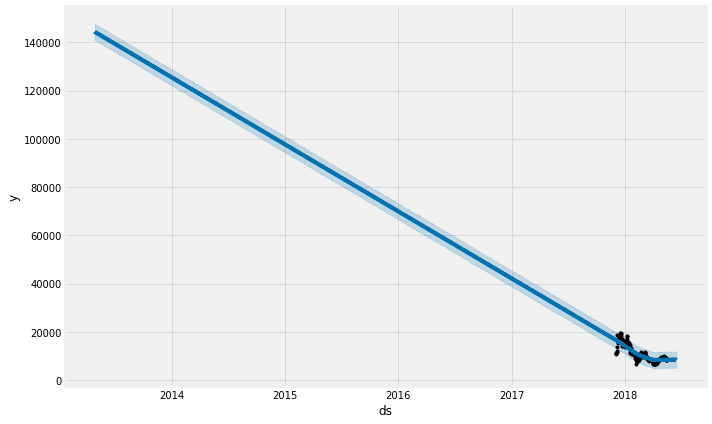

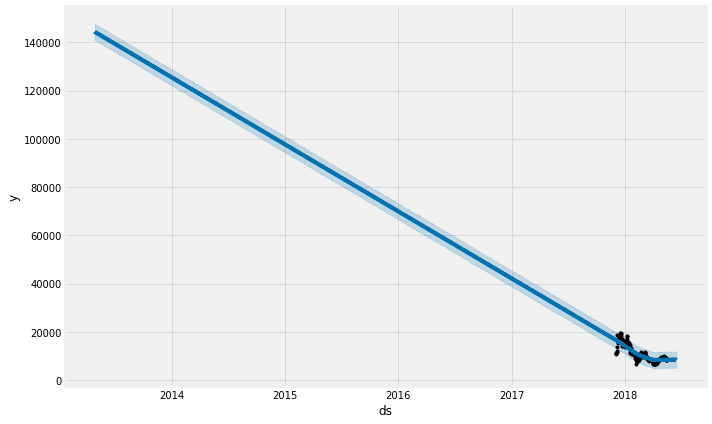

In [40]:
model_2017_and_beyond.plot(forecast_2, uncertainty=True)

In [43]:
df.__class__

pandas.core.frame.DataFrame